In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from copy import deepcopy
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [66]:
data = pd.read_csv('./Dataset/dataset_2.csv')

dates = pd.to_datetime(data['Open_time'])

Close = data['Close']

# Label: 1 if the return is positive (price went up), 0 if negative (price went down)
# Shift the labels by one, so we predict tomorrow's price move based on today's data
labels = (Close.shift(-1) > 0).astype(int)
data['Meta_label'] = labels

# Drop the last row as it will have NaN label
data = data[:-1]

# Prepare data for training
dates = pd.to_datetime(data['Open_time'])
cols = list(data.columns)[1:-1]  # Exclude 'Open_time' and 'Meta_label' from input features
data_for_train = data[cols + ['Meta_label']].astype(float)  # Ensure all data is float
# variables for training
cols = list(data)[1:]
data_for_train = data[cols].astype(float)

data_for_train

,Close,Volume,trades,VIX,Bitcoin_TransactionFee,volatility,GoogleTrend,DowJones,EuroStoxx50,Nasdaq,...,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,TLTETFclose,gasclose,UScornclose,USsoybeanclose,Meta_label
0,0.036845,49971.62698,453411.0,17.31,192.333696,1.302707,66.0,-0.025423,-0.015115,-0.019620,...,29.325947,-1072.903152,-920.702181,13526.109039,8882.510961,0.414527,0.167055,0.113967,0.191973,0.0
1,-0.109893,28725.00074,327519.0,37.32,146.927769,1.312619,41.0,-0.041269,-0.012633,-0.037760,...,32.492548,-1106.884930,-957.938731,13217.366619,8763.750381,0.414527,0.167055,0.113967,0.191973,0.0
2,-0.109893,32014.30845,356134.0,37.32,111.316698,1.252705,38.0,-0.041269,-0.012633,-0.037760,...,28.258612,-1201.875384,-1006.726062,12946.728260,8498.876740,0.427252,0.154930,0.108632,0.182771,1.0
3,0.102615,63403.18258,533510.0,37.32,173.767502,1.327510,63.0,-0.041269,-0.012633,-0.037760,...,24.109870,-1361.903399,-1077.761529,13315.272814,7734.331186,0.418806,0.156399,0.117847,0.199642,0.0
4,-0.006944,100201.50030,785996.0,29.98,164.269986,1.398123,79.0,0.023290,-0.024103,0.021292,...,30.404847,-1414.951520,-1145.199527,13417.628766,7298.310234,0.405968,0.149418,0.121242,0.196319,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-0.001636,27753.33772,611438.0,15.68,18.035864,0.300291,52.0,0.007245,0.000952,0.009409,...,25.208780,-922.451267,-737.873614,31149.984849,24695.238151,0.140203,0.129577,0.325897,0.603272,1.0
2031,0.003244,10022.22322,329412.0,15.08,16.085792,0.300380,46.0,0.006204,0.013559,0.008423,...,24.912057,-922.036622,-774.706216,31054.592756,24483.525244,0.140203,0.129577,0.325897,0.603272,1.0
2032,0.000698,12099.64216,349090.0,15.08,13.471949,0.300414,45.0,0.006204,0.013559,0.008423,...,26.749939,-904.471454,-800.659263,30906.076489,24321.112511,0.141329,0.134354,0.340931,0.617843,1.0
2033,0.061116,22692.62655,523057.0,15.08,16.972956,0.300290,50.0,0.006204,0.013559,0.008423,...,27.164624,-878.947959,-816.317002,30623.324935,24238.822070,0.152477,0.131537,0.323472,0.604294,0.0


In [67]:
data = pd.read_csv('./Dataset/dataset_2.csv')

dates = pd.to_datetime(data['Open_time'])

Close = data['Close']

# Label: 1 if the return is positive (price went up), 0 if negative (price went down)
# Shift the labels by one, so we predict tomorrow's price move based on today's data
labels = (Close.shift(-1) < 0).astype(int)
data['Meta_label'] = labels

# Drop the last row as it will have NaN label
data = data[:-1]

# Prepare data for training
dates = pd.to_datetime(data['Open_time'])
cols = list(data.columns)[1:-1]  # Exclude 'Open_time' and 'Meta_label' from input features
data_for_train1 = data[cols + ['Meta_label']].astype(float)  # Ensure all data is float
# variables for training
cols = list(data)[1:]
data_for_train1= data[cols].astype(float)

data_for_train1

,Close,Volume,trades,VIX,Bitcoin_TransactionFee,volatility,GoogleTrend,DowJones,EuroStoxx50,Nasdaq,...,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,TLTETFclose,gasclose,UScornclose,USsoybeanclose,Meta_label
0,0.036845,49971.62698,453411.0,17.31,192.333696,1.302707,66.0,-0.025423,-0.015115,-0.019620,...,29.325947,-1072.903152,-920.702181,13526.109039,8882.510961,0.414527,0.167055,0.113967,0.191973,1.0
1,-0.109893,28725.00074,327519.0,37.32,146.927769,1.312619,41.0,-0.041269,-0.012633,-0.037760,...,32.492548,-1106.884930,-957.938731,13217.366619,8763.750381,0.414527,0.167055,0.113967,0.191973,1.0
2,-0.109893,32014.30845,356134.0,37.32,111.316698,1.252705,38.0,-0.041269,-0.012633,-0.037760,...,28.258612,-1201.875384,-1006.726062,12946.728260,8498.876740,0.427252,0.154930,0.108632,0.182771,0.0
3,0.102615,63403.18258,533510.0,37.32,173.767502,1.327510,63.0,-0.041269,-0.012633,-0.037760,...,24.109870,-1361.903399,-1077.761529,13315.272814,7734.331186,0.418806,0.156399,0.117847,0.199642,1.0
4,-0.006944,100201.50030,785996.0,29.98,164.269986,1.398123,79.0,0.023290,-0.024103,0.021292,...,30.404847,-1414.951520,-1145.199527,13417.628766,7298.310234,0.405968,0.149418,0.121242,0.196319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,-0.001636,27753.33772,611438.0,15.68,18.035864,0.300291,52.0,0.007245,0.000952,0.009409,...,25.208780,-922.451267,-737.873614,31149.984849,24695.238151,0.140203,0.129577,0.325897,0.603272,0.0
2031,0.003244,10022.22322,329412.0,15.08,16.085792,0.300380,46.0,0.006204,0.013559,0.008423,...,24.912057,-922.036622,-774.706216,31054.592756,24483.525244,0.140203,0.129577,0.325897,0.603272,0.0
2032,0.000698,12099.64216,349090.0,15.08,13.471949,0.300414,45.0,0.006204,0.013559,0.008423,...,26.749939,-904.471454,-800.659263,30906.076489,24321.112511,0.141329,0.134354,0.340931,0.617843,0.0
2033,0.061116,22692.62655,523057.0,15.08,16.972956,0.300290,50.0,0.006204,0.013559,0.008423,...,27.164624,-878.947959,-816.317002,30623.324935,24238.822070,0.152477,0.131537,0.323472,0.604294,1.0


위로 뺄만한 모수들

모델 파라미터 (윈도우사이즈, 벨리데이션 사이즈, 테스트할 데이터 길이 (지금같은경우에는 1))

close return 지금 한 칸 위로 해서 해놨으니까 한칸 안미룬거를 해가지고.. 이게 가장 중요한 피쳐일 거 같음.

현재 지금 X 에 close 다 드랍해놧는데 이거 빼고 

테스트 사이즈 1로 해서 한칸씩 미루는걸로 하기 



상승모델

In [80]:
def directional_loss(y_true, y_pred, alpha=0.5):
    difference = y_pred - y_true
    direction_penalty = torch.where((y_true[1:] > y_true[:-1]) & (y_pred[1:] < y_pred[:-1]) |
                                    (y_true[1:] < y_true[:-1]) & (y_pred[1:] > y_pred[:-1]),
                                    torch.abs(difference[1:]), torch.zeros_like(difference[1:]))
    mse = torch.mean(torch.square(difference))
    directional_error = torch.mean(direction_penalty)
    return mse + alpha * directional_error  # alpha는 방향성 오류의 가중치

class CNNLSTMModelWithSigmoid(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_filters, kernel_size):
        super(CNNLSTMModelWithSigmoid, self).__init__()
        # CNN components
        self.conv1d = nn.Conv1d(input_dim, num_filters, kernel_size, padding='same')
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(2, stride=2)
        # LSTM components
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(num_filters, hidden_dim, num_layers, batch_first=True)
        # Output layer
        self.fc = nn.Linear(hidden_dim, 1)  # Output dimension is 1 for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply CNN layers
        x = x.permute(0, 2, 1)  # Reorder dimensions to (batch size, features, timesteps)
        x = self.conv1d(x)
        x = self.relu(x)
        if x.size(2) > 1:  # Apply maxpooling if the sequence length is greater than 1
            x = self.maxpool(x)
        # Apply LSTM layers
        x = x.permute(0, 2, 1)  # Reorder dimensions to (batch size, timesteps, features)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        x, _ = self.lstm(x, (h0, c0))
        # Apply the output layer
        x = self.fc(x[:, -1, :])  # Only take the output from the last timestep
        x = self.sigmoid(x)  # Apply sigmoid to get probabilities
        return x


def train_and_predict_binary_lstm(data_for_train, window_size):
    # Configuration
    batch_size = 64
    epochs = 100
    all_predictions = []
    all_actuals = []
    input_dim = len(data_for_train.columns) - 1  # Exclude 'Meta_label' from input features

    for start in range(0, len(data_for_train) - window_size, 1):
        end = start + window_size
        window_data = data_for_train[start:end]
        train_data = window_data[:-1]  # Exclude the last point for training
        test_data = window_data[-1:]  # Use the last point for testing
        X_train = torch.tensor(train_data.drop(columns=['Meta_label']).values).float()
        y_train = torch.tensor(train_data['Meta_label'].values).float().view(-1, 1)
        X_test = torch.tensor(test_data.drop(columns=['Meta_label']).values).float()
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

        model = CNNLSTMModelWithSigmoid(input_dim=input_dim, hidden_dim=100, num_layers=2, num_filters=64, kernel_size=3)
        criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data.unsqueeze(1))
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

        # Prediction
        model.eval()
        with torch.no_grad():
            predicted_label = model(X_test.unsqueeze(1)).view(-1).cpu().numpy()
            actual_label = test_data['Meta_label'].values
            all_predictions.extend(predicted_label)
            all_actuals.extend(actual_label)

    # Metrics calculation
    mse = np.mean((np.array(all_actuals) - np.array(all_predictions)) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(np.array(all_actuals) - np.array(all_predictions)))  # 리스트를 NumPy 배열로 변환
    correct_predictions = np.sum((np.array(all_predictions) > 0.5) == np.array(all_actuals))  # 리스트를 NumPy 배열로 변환
    accuracy = correct_predictions / len(all_actuals)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(all_actuals, label='Actual Labels')
    plt.plot(all_predictions, label='Predicted Labels')
    plt.title('Predicted vs Actual Labels')
    plt.xlabel('Timestep')
    plt.ylabel('Label')
    plt.legend()
    plt.show()

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'all_predictions': all_predictions,
        'all_actuals': all_actuals,
        'accuracy' : accuracy
    }

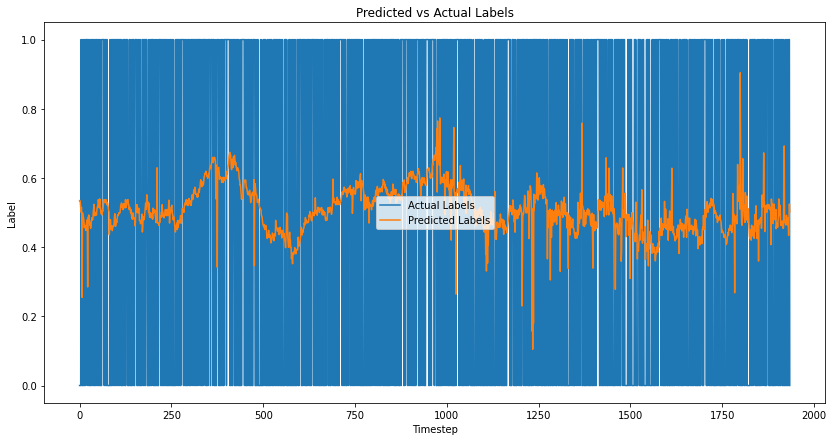

Mean Squared Error (MSE): 0.2530138846938094
Root Mean Squared Error (RMSE): 0.5030048555370111
Mean Absolute Error (MAE): 0.49850235361923545
Accuracy: 50.28423772609819%


([0.5344556,
  0.53501964,
  0.5290931,
  0.51477283,
  0.50127226,
  0.5150369,
  0.4919356,
  0.25469962,
  0.4992425,
  0.49129507,
  0.48519924,
  0.48478106,
  0.47237873,
  0.45667717,
  0.46281216,
  0.45660326,
  0.45652667,
  0.44820747,
  0.45699602,
  0.47127053,
  0.4708417,
  0.47938776,
  0.28484192,
  0.48551142,
  0.48477507,
  0.49299932,
  0.48472443,
  0.47083214,
  0.4632518,
  0.4689892,
  0.45417756,
  0.46299213,
  0.47697136,
  0.47705057,
  0.48504508,
  0.47925743,
  0.4798556,
  0.4994557,
  0.50872594,
  0.52367043,
  0.49094498,
  0.5006262,
  0.49111807,
  0.50031203,
  0.49258927,
  0.4992557,
  0.4931577,
  0.50670797,
  0.5140419,
  0.5176087,
  0.5212549,
  0.53711027,
  0.5287666,
  0.5142521,
  0.52274615,
  0.5395209,
  0.5122534,
  0.51286876,
  0.49886793,
  0.49935532,
  0.49328503,
  0.49289155,
  0.5069194,
  0.50303715,
  0.5127183,
  0.5308616,
  0.5369074,
  0.5369323,
  0.5293491,
  0.5366189,
  0.52843374,
  0.52869636,
  0.5370597,
  0.53

In [81]:
# Set the window size for the rolling window approach
window_size = 100  # Define the size of the window for time series forecasting

# Train the model and predict using the provided data and function
metrics = train_and_predict_binary_lstm(data_for_train, window_size)

# Print out the metrics for evaluation
print(f"Mean Squared Error (MSE): {metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {metrics['rmse']}")
print(f"Mean Absolute Error (MAE): {metrics['mae']}")
print(f"Accuracy: {metrics['accuracy'] * 100}%")  # Convert accuracy to percentage

up_pred = metrics['all_predictions']
up_actual = metrics['all_actuals']

up_pred, up_actual

하락모델

In [82]:
def directional_loss(y_true, y_pred, alpha=0.5):
    difference = y_pred - y_true
    direction_penalty = torch.where((y_true[1:] > y_true[:-1]) & (y_pred[1:] < y_pred[:-1]) |
                                    (y_true[1:] < y_true[:-1]) & (y_pred[1:] > y_pred[:-1]),
                                    torch.abs(difference[1:]), torch.zeros_like(difference[1:]))
    mse = torch.mean(torch.square(difference))
    directional_error = torch.mean(direction_penalty)
    return mse + alpha * directional_error  # alpha는 방향성 오류의 가중치

class CNNLSTMModelWithSigmoid(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_filters, kernel_size):
        super(CNNLSTMModelWithSigmoid, self).__init__()
        # CNN components
        self.conv1d = nn.Conv1d(input_dim, num_filters, kernel_size, padding='same')
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(2, stride=2)
        # LSTM components
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(num_filters, hidden_dim, num_layers, batch_first=True)
        # Output layer
        self.fc = nn.Linear(hidden_dim, 1)  # Output dimension is 1 for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply CNN layers
        x = x.permute(0, 2, 1)  # Reorder dimensions to (batch size, features, timesteps)
        x = self.conv1d(x)
        x = self.relu(x)
        if x.size(2) > 1:  # Apply maxpooling if the sequence length is greater than 1
            x = self.maxpool(x)
        # Apply LSTM layers
        x = x.permute(0, 2, 1)  # Reorder dimensions to (batch size, timesteps, features)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        x, _ = self.lstm(x, (h0, c0))
        # Apply the output layer
        x = self.fc(x[:, -1, :])  # Only take the output from the last timestep
        x = self.sigmoid(x)  # Apply sigmoid to get probabilities
        return x


def train_and_predict_binary_lstm(data_for_train1, window_size):
    # Configuration
    batch_size = 64
    epochs = 100
    all_predictions = []
    all_actuals = []
    input_dim = len(data_for_train1.columns) - 1  # Exclude 'Meta_label' from input features

    for start in range(0, len(data_for_train1) - window_size, 1):
        end = start + window_size
        window_data = data_for_train[start:end]
        train_data = window_data[:-1]  # Exclude the last point for training
        test_data = window_data[-1:]  # Use the last point for testing
        X_train = torch.tensor(train_data.drop(columns=['Meta_label']).values).float()
        y_train = torch.tensor(train_data['Meta_label'].values).float().view(-1, 1)
        X_test = torch.tensor(test_data.drop(columns=['Meta_label']).values).float()
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

        model = CNNLSTMModelWithSigmoid(input_dim=input_dim, hidden_dim=100, num_layers=2, num_filters=64, kernel_size=3)
        criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data.unsqueeze(1))
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

        # Prediction
        model.eval()
        with torch.no_grad():
            predicted_label = model(X_test.unsqueeze(1)).view(-1).cpu().numpy()
            actual_label = test_data['Meta_label'].values
            all_predictions.extend(predicted_label)
            all_actuals.extend(actual_label)

    # Metrics calculation
    mse = np.mean((np.array(all_actuals) - np.array(all_predictions)) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(np.array(all_actuals) - np.array(all_predictions)))  # 리스트를 NumPy 배열로 변환
    correct_predictions = np.sum((np.array(all_predictions) > 0.5) == np.array(all_actuals))  # 리스트를 NumPy 배열로 변환
    accuracy = correct_predictions / len(all_actuals)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(all_actuals, label='Actual Labels')
    plt.plot(all_predictions, label='Predicted Labels')
    plt.title('Predicted vs Actual Labels')
    plt.xlabel('Timestep')
    plt.ylabel('Label')
    plt.legend()
    plt.show()

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'all_predictions': all_predictions,
        'all_actuals': all_actuals,
        'accuracy' : accuracy
    }

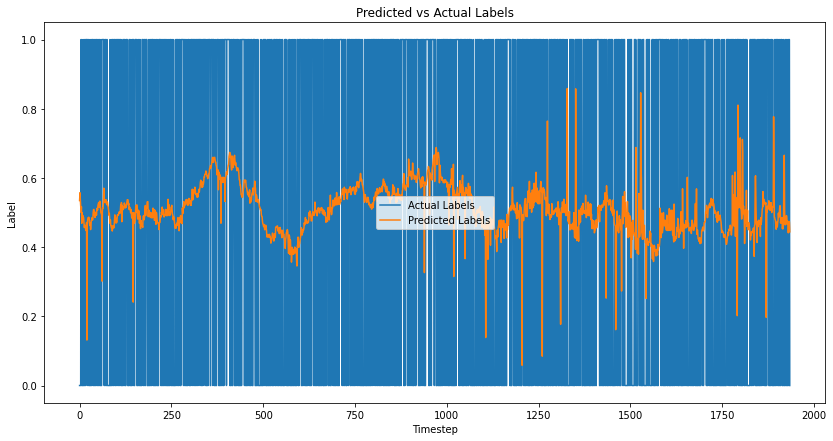

Mean Squared Error (MSE): 0.2548473617950893
Root Mean Squared Error (RMSE): 0.5048240899512317
Mean Absolute Error (MAE): 0.5000086087974159
Accuracy: 49.97416020671835%


([0.5348282,
  0.5572844,
  0.53913075,
  0.5175067,
  0.5007243,
  0.5169051,
  0.46886137,
  0.49901405,
  0.47907105,
  0.49107304,
  0.4854507,
  0.48519257,
  0.46752486,
  0.45656195,
  0.4631946,
  0.45751834,
  0.45692313,
  0.44828293,
  0.45741355,
  0.4710492,
  0.13130519,
  0.4644098,
  0.47952265,
  0.48508528,
  0.48526263,
  0.4864194,
  0.48537534,
  0.47117016,
  0.46327713,
  0.46937972,
  0.45067373,
  0.4626772,
  0.47746438,
  0.47759023,
  0.48522395,
  0.4791438,
  0.4791962,
  0.49934486,
  0.50867736,
  0.5089471,
  0.49282154,
  0.500759,
  0.4858745,
  0.5006846,
  0.49268243,
  0.49963167,
  0.49242565,
  0.5071282,
  0.51284224,
  0.50693846,
  0.5211237,
  0.5245347,
  0.5290064,
  0.5146541,
  0.5238696,
  0.53291166,
  0.5237273,
  0.51339674,
  0.49909237,
  0.49784774,
  0.49252212,
  0.30169612,
  0.50459135,
  0.5126054,
  0.512535,
  0.5312063,
  0.57050824,
  0.53691095,
  0.52923083,
  0.53645307,
  0.528994,
  0.52902275,
  0.5370879,
  0.530728

In [83]:
# Set the window size for the rolling window approach
window_size = 100  # Define the size of the window for time series forecasting

# Train the model and predict using the provided data and function
metrics = train_and_predict_binary_lstm(data_for_train, window_size)

# Print out the metrics for evaluation
print(f"Mean Squared Error (MSE): {metrics['mse']}")
print(f"Root Mean Squared Error (RMSE): {metrics['rmse']}")
print(f"Mean Absolute Error (MAE): {metrics['mae']}")
print(f"Accuracy: {metrics['accuracy'] * 100}%")  # Convert accuracy to percentage

down_pred = metrics['all_predictions']
down_actual = metrics['all_actuals']

down_pred, down_actual

In [86]:
prediction = (-1 * down_pred) + (1 * up_pred)
prediction = np.array(prediction)
up_actual = np.array(up_actual)
down_actual = np.array(down_actual)
prediction

array([0.5344556 , 0.53501964, 0.5290931 , ..., 0.49029225, 0.52478063,
       0.50169545], dtype=float32)

In [87]:
# Accuracy 계산
correct_predictions = ((up_actual == 1) & (prediction > 0.5)) | ((up_actual == 0) & (prediction <= 0.5))
accuracy = correct_predictions.mean()
accuracy

0.5028423772609819

time delay 랑 개형 유사도 보기 -> DTW?

Soybean 이런거 반영하는 시간이 다르니까.. 선물같은거는 time delay를 줘야하는데

파라미터튜닝 -> 그리드서치 + 윈도우 크기도 그리드 한번 해보기

리턴 스케일에서 MSE 보기 (테스트에서만)

현재 각 윈도우마다 하나의 값이 나옴. 예를 들면 전체 윈도우 크기가 100이면 테스트 크기인 10에서 똑같은 값이 나옴

log scale로 한번 돌려보기 

In [54]:
pd.DataFrame(metrics['all_predictions']).to_csv("asdasdsad.csv")

In [55]:
def calculate_sign_agreement_ratio(all_predictions, all_actuals):
    # Ensure both lists are of the same length
    if len(all_predictions) != len(all_actuals):
        raise ValueError("The lengths of all_predictions and all_actuals do not match.")

    # Calculate the ratio of instances where the signs of predictions and actuals match
    sign_agreement_count = sum(
        np.sign(pred) == np.sign(actual) for pred, actual in zip(all_predictions, all_actuals)
    )
    sign_agreement_ratio = sign_agreement_count / len(all_predictions)

    return sign_agreement_ratio

컨퓨전매트릭스

- Simple strategy

Expected > 0 -> Buy
Expected < 0 -> liquadate, i.e. sell to avoid loss or gain.

transaction fee 생각해서 빼놓기

- 여기서 확인할 수 있는 것 : 결국 최종 close 예측 값은 거의 비슷함 -> 거의 예측된 것으로 보이는데 ; Daily return으로 볼 때는 예측력이 떨어지는 것으로 보임. / 뭐가 문제일까

실제로 한 timeline 밀린것인지 ; 다 밀어놨는데

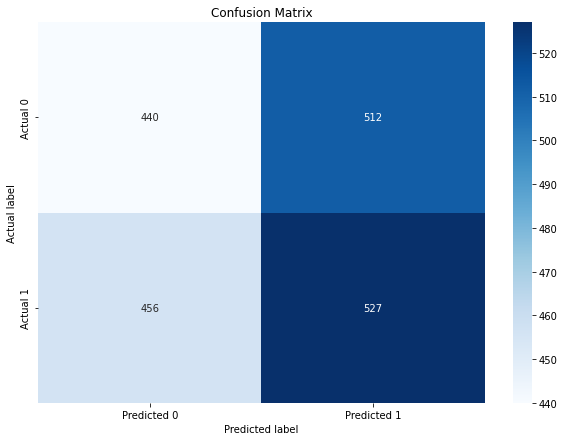

In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming metrics['all_predictions'] and metrics['all_actuals'] contain the predicted and actual labels respectively.
# Convert predictions to binary format based on 0.5 threshold
all_predictions_binary = np.array(metrics['all_predictions']) > 0.5
all_actuals = np.array(metrics['all_actuals'])

# Generate the confusion matrix
cm = confusion_matrix(all_actuals, all_predictions_binary)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
